First proyect to learn and explore linear regression. We are going to analyse the california housing prices using a linear regression. For that we will take the housing.csv dataset.

### Objective: 
- Understand the relationship between various features and house prices.
- Build a linear regression model to predict house prices.

In [16]:
#First we start with the enviroment setup
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv("housing.csv")

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [19]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [72]:
print("Number of rows and columns:", data.shape, "\n")

print("Data types and info:")
print(data.info())

print("Columns from data:", data.columns)

Number of rows and columns: (20640, 10) 

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
Columns from data: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_valu

In [21]:
rows_with_na = data[data.isnull().any(axis=1)]
unique_class_name = rows_with_na['ocean_proximity'].unique()
unique_class_name

array(['NEAR BAY', 'INLAND', 'NEAR OCEAN', '<1H OCEAN'], dtype=object)

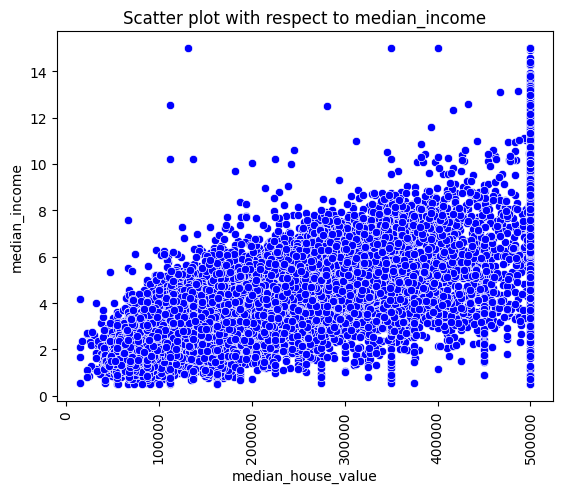

In [73]:
df = pd.read_csv('housing.csv')

sns.scatterplot(x=df["median_house_value"], y=df["median_income"], color = "b")
plt.title("Scatter plot with respect to median_income")
plt.xticks(rotation = 90)
plt.show()

In [23]:
#We need to transform the categorical variables 
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

In [24]:
for column in data.columns:
    if data[column].dtype == float:
        all_integers = (data[column] % 1 == 0).all()

        print(f"All numbers are integers in column '{column}':", all_integers)

        if all_integers:
            data[column] = data[column].astype(int)
            print(f"Column '{column}' converted to intergers.")
        else:
            print(f"there are some numbers that are not pure int in column '{column}'.")
    else:
        print(f"No check needed for column '{column}' as it is not float.")

All numbers are integers in column 'longitude': False
there are some numbers that are not pure int in column 'longitude'.
All numbers are integers in column 'latitude': False
there are some numbers that are not pure int in column 'latitude'.
All numbers are integers in column 'housing_median_age': True
Column 'housing_median_age' converted to intergers.
All numbers are integers in column 'total_rooms': True
Column 'total_rooms' converted to intergers.
All numbers are integers in column 'total_bedrooms': False
there are some numbers that are not pure int in column 'total_bedrooms'.
All numbers are integers in column 'population': True
Column 'population' converted to intergers.
All numbers are integers in column 'households': True
Column 'households' converted to intergers.
All numbers are integers in column 'median_income': False
there are some numbers that are not pure int in column 'median_income'.
All numbers are integers in column 'median_house_value': True
Column 'median_house_val

In [25]:
total_rows = len(df)
missing_rows = df['total_bedrooms'].isna().sum()

percentage_missing = (missing_rows/total_rows)*100
print(f'percentage of missing values: {percentage_missing:.2f}%')

percentage of missing values: 1.00%


### Data splitting

Now we are going to do the Data Splitting 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

#split data into training and testing 

X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                  'total_bedrooms', 'population', 'households', 'median_income']]
y = data['median_house_value']

X.shape, y.shape

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

print("training set shape: ", X_train.shape, y_train.shape)
print("testing set shape: ", X_test.shape, y_test.shape)

training set shape:  (16512, 8) (16512,)
testing set shape:  (4128, 8) (4128,)


In [74]:
#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Calculate the Mean Squared Error (MSE)​⬤
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")


MSE: 5052953703.90


In [29]:
from sklearn.metrics import mean_absolute_error

#Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}$")

#Calculate the MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}$")


RMSE: 71084.13$
MAE: 51835.73$


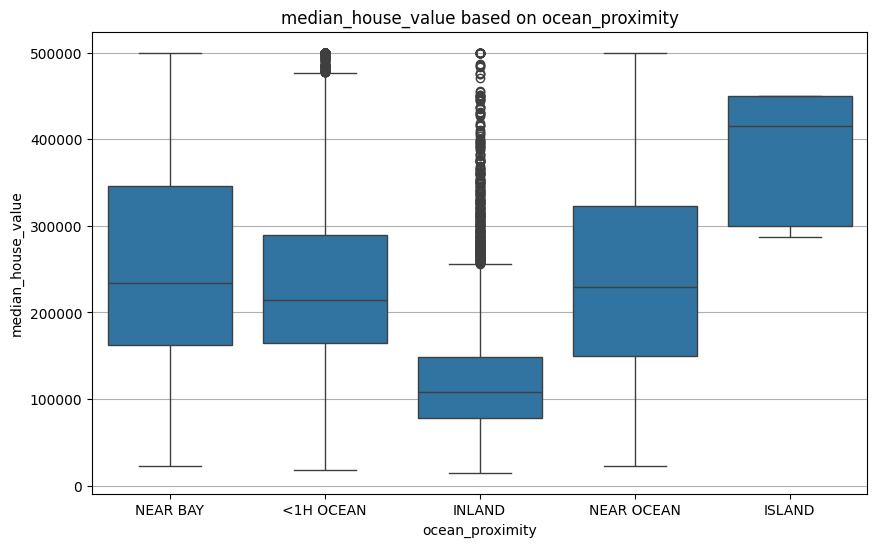

In [46]:
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('median_house_value based on ocean_proximity')
plt.show()